In [10]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('actividad2.csv', sep=';')

In [46]:
# Seleccion de variables predictoras y la variable objetivo
predictors = ['Education', 'Occupation', 'Gender', 'MaritalStatus', 'TotalChildren']
target = 'BikeBuyer'

data_filtered = data[predictors + [target]]

data_filtered = pd.get_dummies(data_filtered)

X_train, X_test, y_train, y_test = train_test_split(data_filtered.drop(target, axis=1),
                                                    data_filtered[target],
                                                    test_size=0.2,
                                                    random_state=42)

# Inicialización y entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Ejecución de predicciones
y_pred = model.predict(X_test)

In [ ]:
print(X_train,)

In [ ]:
print(X_train.iloc[[0]])
print(X_train.columns)

Matriz de Confusión:
[[ 913  762]
 [ 450 1546]]


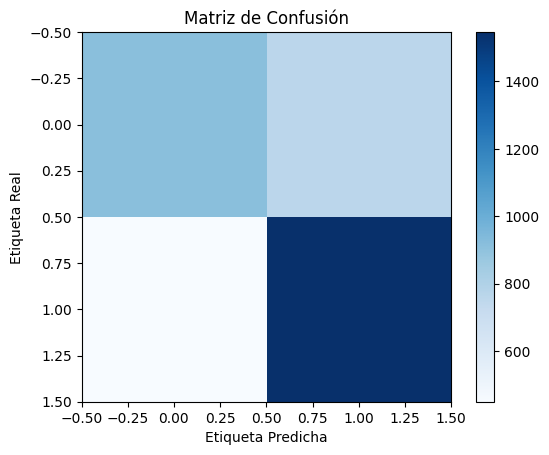

In [47]:

print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [48]:
# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))





Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60      1675
           1       0.67      0.77      0.72      1996

    accuracy                           0.67      3671
   macro avg       0.67      0.66      0.66      3671
weighted avg       0.67      0.67      0.66      3671



In [49]:
# Prediccón 1
new_data1 = pd.DataFrame(columns=X_train.columns, data=[[0]*len(X_train.columns)])

new_data1['Education_Bachelors'] = 1
new_data1['Occupation_Management'] = 1
new_data1['Gender_M'] = 1
new_data1['MaritalStatus_S'] = 1
new_data1['TotalChildren'] =  2

prediction = model.predict(new_data1)
print("\nPredicción para el nuevo cliente:", prediction)



Predicción para el nuevo cliente: [1]


In [50]:
# Prediccón 2
new_data1 = pd.DataFrame(columns=X_train.columns, data=[[0]*len(X_train.columns)])

new_data1['Education_Partial College'] = 1
new_data1['Occupation_Skilled Manual'] = 1
new_data1['Gender_F'] = 1
new_data1['MaritalStatus_S'] = 1
new_data1['TotalChildren'] =  0



prediction = model.predict(new_data1)
print("\nPredicción para el nuevo cliente:", prediction)


Predicción para el nuevo cliente: [0]
